<a href="https://colab.research.google.com/github/Curiousss/EVA/blob/master/Assignment3/1stDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Import the packages that are needed:

* Numpy for mathematically calculations
* Functions from Keras to build neural network
* MNIST dataset which will be the training data

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Display the first image from the training set using the matplotlib library.

(60000, 28, 28)


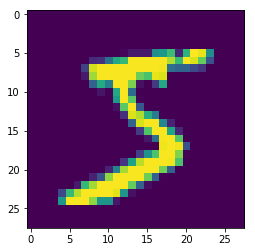

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])


Reshape the input data by adding another dimension to represent the number of channels. The number of channels for MNIST images is 1 (representing the grayscale)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Normalise the image pixel values. Normalization helps to train the network faster.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Display the first 10 values of y, the labels.

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

np.utils.to_categorical is used to convert array of labeled data(from 0 to number of classes-1) to one-hot vector.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


Display first 10 values of Y. This time it will be the one-hot vecor.

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Convolutional neural network with 16,586 parameters:

* Starting with 3 3x3 convolutional layers with relu activation and drop out of 20%
* Bottleneck layer with Max pooling followed by 1x1 convolutional layer
*  Then 2 3x3 convolutional layers with relu activation and drop out of 20%
* Bottleneck layer with Max pooling followed by 1x1 convolutional layer
* 1 layer of 3x3 Convolutions with relu activation
* Flatten layer
* Output layer of softmax to get confidence level of the network that the input is of a certain number

In [10]:
from keras.layers import Activation, MaxPooling2D, Dropout
model = Sequential()

 
model.add(Convolution2D(16, 3,3, activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.2))

model.add(Convolution2D(16, 3,3, activation='relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(32, 3,3, activation='relu'))
model.add(Dropout(0.2))

model.add(MaxPooling2D())
model.add(Convolution2D(16, 1, activation='relu'))

model.add(Convolution2D(16, 3,3, activation='relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(32, 3,3, activation='relu'))
model.add(Dropout(0.2))

model.add(MaxPooling2D())
model.add(Convolution2D(16, 1, activation='relu'))

model.add(Convolution2D(10, 3,3))

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`


Configure the model with loss function, Cross Entropy and Adam optimizer.

* The learning rate was reduced to 0.0001 after 30 epochs to get a stable accuracy

In [0]:
from keras.callbacks import EarlyStopping	
adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])
es = EarlyStopping(monitor='val_acc', mode='max', min_delta=1)

The network was trained 10 epochs at a time until the validation desired accuracy of 99.43% was reached.

In [19]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
  704/60000 [..............................] - ETA: 14s - loss: 0.0156 - acc: 0.9957

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 13s 213us/step - loss: 0.0136 - acc: 0.9955
Epoch 2/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0133 - acc: 0.9954
Epoch 3/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.0143 - acc: 0.9953
Epoch 4/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0138 - acc: 0.9951
Epoch 5/10
60000/60000 [==============================] - 14s 236us/step - loss: 0.0141 - acc: 0.9954
Epoch 6/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0142 - acc: 0.9951
Epoch 7/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0137 - acc: 0.9953
Epoch 8/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.0129 - acc: 0.9955
Epoch 9/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0120 - acc: 0.9960
Epoch 10/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0125 - ac

Test the model with test dataset.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

## The network was trained 10 epochs at a time until the validation desired accuracy of 99.43% was reached.

In [21]:
print(score)

[0.020303058327929467, 0.9943]


Find the predicted values

In [0]:
y_pred = model.predict(X_test)

In [23]:
print(y_pred[:9])
print(y_test[:9])

[[1.71518022e-10 5.75653614e-09 6.56456734e-07 2.94192510e-08
  5.73161397e-12 1.96648628e-10 5.89193471e-17 9.99999166e-01
  1.07297060e-09 1.29160981e-07]
 [9.41080943e-05 1.58228329e-06 9.99902964e-01 7.31046468e-09
  1.75029076e-08 9.15785017e-11 1.06660923e-06 5.13267068e-11
  1.84383453e-07 4.31601560e-10]
 [1.79816382e-07 9.99979496e-01 2.91144238e-06 3.02996961e-09
  7.90057675e-06 4.03979243e-07 4.73237378e-07 8.18703393e-06
  3.50781136e-07 1.65977198e-07]
 [9.99937177e-01 4.55132008e-11 2.05854718e-07 5.95140492e-10
  3.37808750e-08 6.27742409e-08 6.21114305e-05 3.19879732e-08
  1.66254299e-08 3.97777427e-07]
 [1.43485132e-13 4.48359839e-12 5.42767003e-12 1.58745793e-16
  9.99999166e-01 5.99261526e-12 1.95971642e-10 6.97433944e-10
  1.45489384e-10 7.86605426e-07]
 [4.80958597e-08 9.99985933e-01 1.91172239e-06 3.18929355e-10
  9.64067658e-06 4.38685213e-08 3.00747956e-07 1.92659104e-06
  1.39433283e-07 7.96448418e-08]
 [8.69411473e-15 3.70083897e-09 2.36579950e-10 1.58485395e

Read the layer details into a dictionary with layer name as the key

In [26]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7f3918ec1e48>, 'dropout_1': <keras.layers.core.Dropout object at 0x7f39099cd9e8>, 'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7f38bd8a4cc0>, 'dropout_2': <keras.layers.core.Dropout object at 0x7f38bd8a4cf8>, 'conv2d_3': <keras.layers.convolutional.Conv2D object at 0x7f38bd8a4dd8>, 'dropout_3': <keras.layers.core.Dropout object at 0x7f38bd8c4a90>, 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D object at 0x7f38bd8c4c88>, 'conv2d_4': <keras.layers.convolutional.Conv2D object at 0x7f38bd01c7b8>, 'conv2d_5': <keras.layers.convolutional.Conv2D object at 0x7f38bcfed2b0>, 'dropout_4': <keras.layers.core.Dropout object at 0x7f38bcfedb70>, 'conv2d_6': <keras.layers.convolutional.Conv2D object at 0x7f38bd003e80>, 'dropout_5': <keras.layers.core.Dropout object at 0x7f38bcfbd4a8>, 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D object at 0x7f38bcfbd748>, 'conv2d_7': <keras.layers.convolutional.Conv2D object at 0

Function deprocess_image:
* Function to extract the image from a tensor. The tensor has the normalized data, the original pixel values need to be calculated to get the original values of an image

vis_img_in_filter
* For a given kernel in the trained network generate an image that triggeres maximum activation in that kernel and display it.



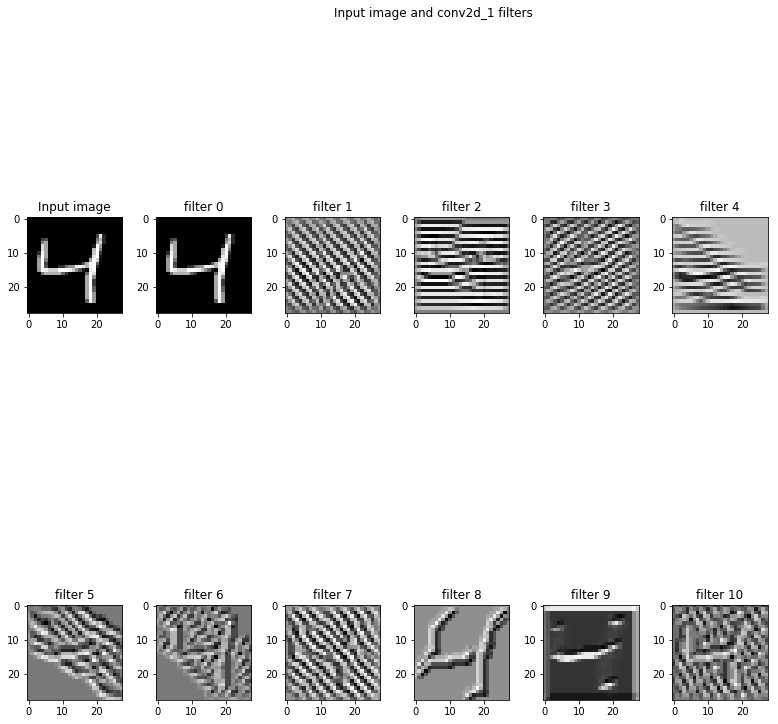

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()